<a href="https://colab.research.google.com/github/BeltranPascual/Deep-Learning/blob/master/Copia_de_Autoevaluacion_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolución en Python del ejercicio de autoevaluación con la base de datos de Fashion -MNIST. Se realizó con colab (https://colab.research.google.com/)

**Mauricio Beltrán, Juan Antonio Vicente y Alfonso Carabantes**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

Modelo base

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.8144 - accuracy: 0.7114
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.5146 - accuracy: 0.8152
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4498 - accuracy: 0.8416
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4139 - accuracy: 0.8541
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.4042 - accuracy: 0.8580
Test accuracy: 0.8579999804496765


In [ ]:
predictions = model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [ ]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

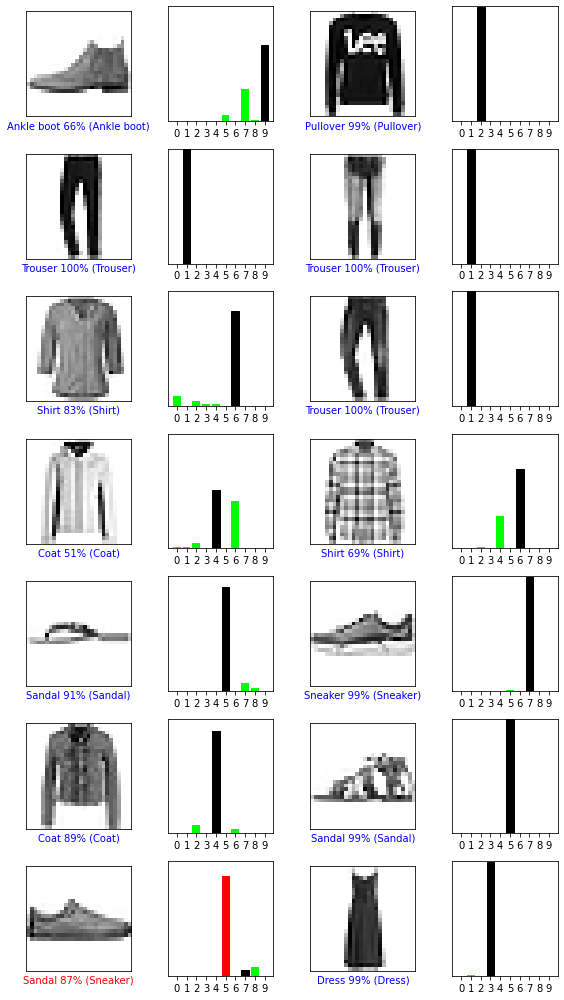

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

Se duplican el número de neuronas y capa densa de 64 neuronas

In [ ]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.7878 - accuracy: 0.7179
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.4992 - accuracy: 0.8194
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.4248 - accuracy: 0.8479
Epoch 4/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.3863 - accuracy: 0.8622
Epoch 5/5
313/313 [==============================] - 9s 29ms/step - loss: 0.3699 - accuracy: 0.8684

Test accuracy: 0.868399977684021


Modelo 3: cambiamos ahora el optimizador antes sdg, ahora adam

In [ ]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.4085 - accuracy: 0.8526
Epoch 2/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.2682 - accuracy: 0.9024
Epoch 3/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2246 - accuracy: 0.9162
Epoch 4/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.1951 - accuracy: 0.9272
Epoch 5/5
313/313 [==============================] - 9s 29ms/step - loss: 0.2651 - accuracy: 0.9113

Test accuracy: 0.911300003528595


Modelo 4: Complejidad añadida y uso del BathNormalization y DropOut

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 659s 352ms/step - loss: 0.5038 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 660s 352ms/step - loss: 0.3200 - accuracy: 0.8867
Epoch 3/5
1875/1875 [==============================] - 658s 351ms/step - loss: 0.2769 - accuracy: 0.9017
Epoch 4/5
1875/1875 [==============================] - 657s 351ms/step - loss: 0.2468 - accuracy: 0.9132
Epoch 5/5
313/313 [==============================] - 24s 75ms/step - loss: 0.1994 - accuracy: 0.9284

Test accuracy: 0.9283999800682068


Se recomienda que se pruebe con más Epoch para aumentar más la precisión.

Modelo 5: Modelo anterior con híper parámetros del optimizador *Adam*

In [ ]:
model = make_model()

optimizer = tf.keras.optimizers.Adam (lr=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

history = model.fit(train_images, train_labels, epochs=5, callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 663s 354ms/step - loss: 0.4966 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 662s 353ms/step - loss: 0.3120 - accuracy: 0.8897
Epoch 3/5
1875/1875 [==============================] - 665s 355ms/step - loss: 0.2663 - accuracy: 0.9061
Epoch 4/5
1875/1875 [==============================] - 659s 352ms/step - loss: 0.2354 - accuracy: 0.9165
Epoch 5/5
313/313 [==============================] - 23s 74ms/step - loss: 0.1983 - accuracy: 0.9290

Test accuracy: 0.9290000200271606


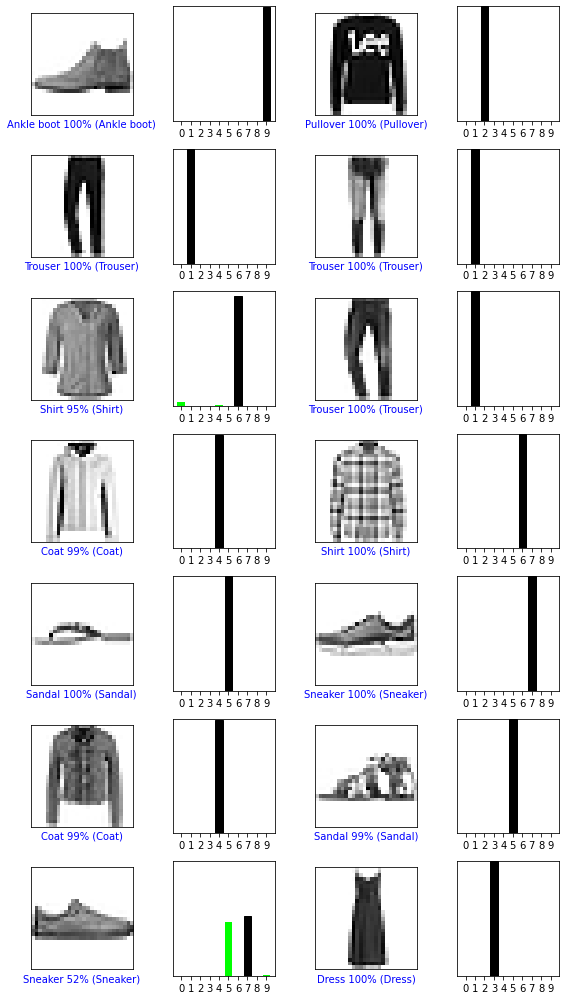

In [ ]:
predictions = model.predict(test_images)

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()